# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


# Linear Regression
Linear regression is a regression of the form y = theta 1 x^1 +theta2 x^0+ epsilon. It can be used when the data we are trying to fit has a linear shape, i.e. a line, but it cannot fit a model in the form of a polynomial.
# Polynomial Regression
This is what the regression that allows the model to fit more complex data, based on the same initial set of data. By calling SKLearn Polynomial Features, we will be transforming the data in the following way. Assume we have 1D data of two inputs. [a,b], it will be transformed to [1,a^2,b^2,ab]. And we can fit our coefficients on those 4 inputs instead if 2. Assuming degree 2. That is.
# Underfitting
Underfitting means your model is not complex enough to capture completely your data. I.e. fitting a line through a (x^2) shape for instance.
# Overfitting
This means your model is way too complex, to capture what happened in the data. I.e. you are also fitting the noise of that data. I.e. Fitting a (x^2) with a polynomial of degree 10. It is akin to have memorized the data completely.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

# Logistic Regression
It allows to classify data that cannot be modeled to a regression. Logistic Regression returns the probability of an event being to one class or another. Since probability cannot be more than 1, less than 0, regression cannot work, since the forbidden values are possible. It is basically done through a Sigmoid, Relu, TanH.

# Linear SVM
It is a plane create that maximize the margins between the data. The margins are calculate with the support vectors, i.e. the vectors that are on the margin of the hyperplane. However, is it not always possible to classify it with a linear kernel, but augmenting to a higher dimension will work. Slack variables are used to allow approximation and errors if the case that we do not want to use kernels to augment out dimension.

# Link for Linear Kernel does not work
https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:Kernel_Machine.svg

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

In [14]:
#This Question

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [120]:
# Implement kNN by hand. It might be useful to store all distances in one array/list
import csv
import math
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier as KNC
from collections import Counter

# loading dataset
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset 3 classies in total
df.head()

#Shuffle data. drop=True prevent from creating another feature column with previous index
df = df.sample(frac=1).reset_index(drop=True)

#Split into train test
train=df.iloc[:100]
test=df.iloc[100:]

#split feature-target
trainx = train.drop(columns = "target")
trainy = train.target

testx=test.drop(columns="target")
testy=test.target

#Lets just try to fit the data
knn1 = KNC(n_neighbors=3)
knn1=knn1.fit(trainx,trainy)
pred=knn1.predict(testx)

In [121]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.4,3.2,5.3,2.3,2.0
1,6.7,3.0,5.0,1.7,1.0
2,4.9,3.1,1.5,0.2,0.0
3,6.1,2.8,4.7,1.2,1.0
4,7.2,3.6,6.1,2.5,2.0


In [122]:
#Define Accuracy function
def accuracy(real, predict):
    return (sum(real == predict) / float(real.size))*100

In [123]:
print("Accuracy of",accuracy(testy, pred))

Accuracy of 96.0


In [124]:
#Lets Implement it by hand

In [125]:
#Step 1: Distance Calculation
def distance(a,b):
    return np.linalg.norm(a-b)

In [126]:
#Step 2: For each point in test set, calculate the distance between each train point.

def alldist(train,testelement): #calculate the distance for one element in the testset
    dist=[]
    for x in range(train.shape[0]): #loops through the entire trainset (panda dataframe)
        temp=np.asarray(train.loc[x])
        dist.append(distance(temp,testelement))
    return dist


In [127]:
def knn(trainx,trainy,testx,testy,k=1):
    count = 0
    for x in range(test.shape[0]):
        a=np.asarray(testx.iloc[x])
        temp=alldist(trainx,a)
        temp=np.asarray(temp)
        b=np.where(temp==np.amin(temp))[0][0]
        if(trainy.iloc[b]==testy.iloc[x]):
            count +=1
    return count

In [132]:
print("Accuracy of self implemented knn is",(knn(trainx,trainy,testx,testy)/test.shape[0]*100))

Accuracy of self implemented knn is 96.0


In [103]:
#np.amin(test)

0.2999999999999998

In [104]:
#np.where(test==np.amin(test))[0][0]

46

In [77]:
#trainy.iloc[20]

2.0

In [87]:
#testy.iloc[1]

2.0

In [84]:
#testy

75     1.0
76     2.0
77     0.0
78     2.0
79     2.0
80     2.0
81     0.0
82     1.0
83     2.0
84     0.0
85     1.0
86     2.0
87     1.0
88     0.0
89     0.0
90     0.0
91     2.0
92     0.0
93     1.0
94     1.0
95     0.0
96     2.0
97     1.0
98     0.0
99     1.0
100    2.0
101    0.0
102    2.0
103    2.0
104    2.0
      ... 
120    0.0
121    1.0
122    0.0
123    2.0
124    1.0
125    2.0
126    1.0
127    0.0
128    1.0
129    2.0
130    1.0
131    1.0
132    0.0
133    2.0
134    2.0
135    1.0
136    2.0
137    2.0
138    0.0
139    2.0
140    0.0
141    0.0
142    0.0
143    2.0
144    2.0
145    1.0
146    2.0
147    0.0
148    1.0
149    0.0
Name: target, Length: 75, dtype: float64

### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

# Bagging
Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

# Boosting
Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners.

# When to use
Use Boosting for a better bias and bagging to prevent from overfitting.

# Decision Tree
It is a tree that classify thing starting from the biggest component to go to the smallest.

# Random Forest
It is a collection of decision trees.

# Pros and cons
## Decision Tree
1. Easy to interpret and make for straightforward visualizations.
2. The internal workings are capable of being observed and thus make it possible to reproduce work.
3. Can handle both numerical and categorical data.

1. Low Biase
2. High Variance
3. Overfitting

## Random Forest
1. There is no need for feature normalization.
2. Individual decision trees can be trained in parallel.
3. They reduce overfitting

1. They’re not easily interpretable.
2. They’re not a state-of-the-art algorithm.
3. Fails on rare outcomes

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

# PCA
A PCA creates new features based on the old features. I.e. a linear combination of old variables creates the new variable i.e. the best combination of original variables such that the variance between the new variables is the maximum.

The eigenvector represents an axis and the eigen value is the variance along that eigen vector. So the higher the eigen value, the more variance we keep, so the more representable our new artificial variable is compared to the original variable. 

We substract the mean, to center our results so it has "less variance(I guess??)"

Autoencoders are not restricted to linear map unlike PCA. The autoencoder goes both way. It is a type of artificial neural network used to efficiently encode the data in an unsupervised manner. It not only allow for dimension reducing (although it may sometime increase the dimension) - Encoding -, however, while encoding, it will also learn a decoding weights such that the encoded can be now decoded. 

It is similar when the autoencoder has a single layer. i.e. it is linear. 


### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [70]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


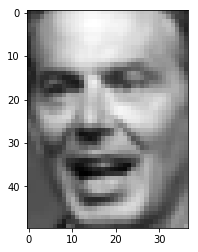

In [116]:
# plot an example image
import matplotlib.pyplot as plt
plt.imshow(X[1].reshape(h,w), cmap = 'gray')
plt.show()
### insert your code here ###

In [121]:
from sklearn.preprocessing import StandardScaler
StdSc = StandardScaler()
X=StdSc.fit_transform(X)

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components=900)
X = pca.fit_transform(X)

In [140]:
trainx=X[:1000]
trainy=y[:1000]
testx=X[1000:]
testy=y[1000:]

In [146]:
knn1 = KNC(n_neighbors=5)
knn1=knn1.fit(trainx,trainy)
pred=knn1.predict(testx)
print("Accuracy of",accuracy(testy, pred))

Accuracy of 62.84722222222222


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [147]:
### your code below ###